In [1]:
# I have some data points X and the corresponding labels y (0 or 1)

# X is a continous data with each data point being a 2 dimensional vector

In [2]:
import numpy as np

In [22]:
np.random.seed(32)
x = np.random.rand(2)

In [64]:
X = np.random.rand(100, 1)
y = np.random.randint(2, size=100)

In [65]:
X[0]

array([0.15970447])

In [66]:
n = len(X) # length of dataset

In [67]:
dataset = [(X[i], y[i]) for i in range(n)]

In [68]:
import matplotlib.pyplot as plt

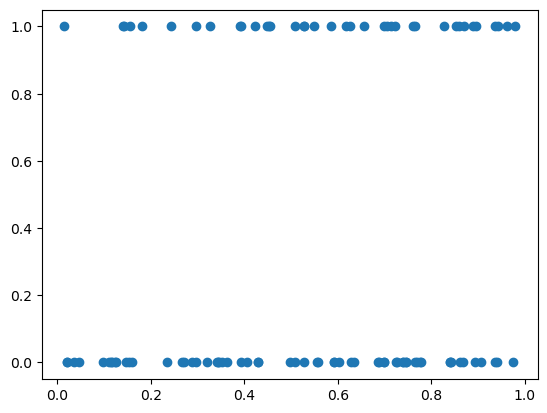

In [72]:
plt.scatter(X, y)

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

In [74]:
X.shape

(100, 1)

In [75]:
np.zeros(1).shape

(1,)

In [76]:
def fit(X, y, lr=0.01, epochs=100, lambda_penalty=0.0001):
    n, p = X.shape
    W = np.zeros(p)
    for _ in range(epochs):
        z = X @ W
        pred = sigmoid(z)
        
        # loss = y * np.log(pred) + (1-y) * np.log(1-pred) + lambda_penalty * W
        
        grad = (X.T @ (pred-y)) / n + lambda_penalty * W
        
        W -= grad * lr
    return W
        
        

In [77]:
def predict_proba(X, W):
    return sigmoid(X @ W)

In [87]:
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[81:], y[81:]

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/dummy_logreg_data.csv")
data.head()

,x1,x2,x3,x4,y
0,0.304717,-1.039984,0.750451,0.940565,1
1,-1.951035,-1.302180,0.127840,-0.316243,0
2,-0.016801,-0.853044,0.879398,0.777792,1
3,0.066031,1.127241,0.467509,-0.859292,0
4,0.368751,-0.958883,0.878450,-0.049926,1


In [5]:
X = data.iloc[:, :-1]

In [ ]:
"""
OR function
0, 1, -> 1
1, 0 -> 1
1, 1 -> 1
0, 0 -> 0
"""


['x1', 'x2', 'x3', 'x4']

## Logistic Regression

A <b>supervised learning</b> method (where both inputs and outputs are available) used in <b>Binary Classification</b> tasks. <br>
Given some input data (continuous or categorical), the model outputs a probability between 0 and 1 [bounded]


Core of Logistic Regression is <b>Sigmoid function</b> which maps any real-valued input to the range of (0,1), making a representation of probability. <br>
It squashes the large positive values near 1 and learge negative values near 0 with f(z=0) = 0.5


In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = x1 x w1 + x2 x w2 + ... + b <br>
z = x.T @ W + b -> logit or log-odds of the positive class <br>
prob = sigmoid(z)  -> (0, 1)

Weights and biases is learned via the Maximum Likelihood Estimation (MLE) <br>

Likelihood of the data ($x_i, y_i$), m samples assuming each sample is independent: <br>

L(w, b) = $\prod_{i=1}^{m} P(y_i | x_i ;w, b)$

$P(y=1|x;w,b) = \sigma(w.x + b)$ <br>
$P(y=0|x;w,b) = 1- \sigma(w.x + b)$

In [14]:
data

,x1,x2,x3,x4,y
0,0.304717,-1.039984,0.750451,0.940565,1
1,-1.951035,-1.302180,0.127840,-0.316243,0
2,-0.016801,-0.853044,0.879398,0.777792,1
3,0.066031,1.127241,0.467509,-0.859292,0
4,0.368751,-0.958883,0.878450,-0.049926,1
...,...,...,...,...,...
995,0.327411,-0.255640,-0.357530,-1.367754,0
996,-0.805918,-0.622008,-1.123972,0.439924,0
997,1.196628,-0.908062,0.283441,-1.034111,1
998,-0.304922,-0.690330,0.601896,-0.678788,0


In [30]:
import numpy as np

In [34]:
X = np.array(data.iloc[:, :-1])
X.shape

(1000, 4)

In [21]:
y = data.iloc[:, -1].to_list()

In [ ]:

w = np.random.rand(10, 4)

In [49]:
w

array([[0.98619273],
       [0.33329567],
       [0.43042797],
       [0.05821933]])

In [51]:
X[0]

array([ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472])

In [ ]:
sum([w[i]*X[0][i] for i in range(4)])


array([0.33166181])

In [50]:
X[0] @ w

array([0.33166181])

In [53]:
from tqdm import tqdm

In [54]:
X.shape

(1000, 4)

In [59]:
w.shape, X.shape

((4,), (1000, 4))

In [66]:
(X @ w).shape

/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/1549639326.py:1: RuntimeWarning: divide by zero encountered in matmul
  (X @ w).shape
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/1549639326.py:1: RuntimeWarning: overflow encountered in matmul
  (X @ w).shape
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/1549639326.py:1: RuntimeWarning: invalid value encountered in matmul
  (X @ w).shape


(1000,)

In [65]:
(w @ X.T).shape

/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/629168466.py:1: RuntimeWarning: divide by zero encountered in matmul
  (w @ X.T).shape
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/629168466.py:1: RuntimeWarning: overflow encountered in matmul
  (w @ X.T).shape
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/629168466.py:1: RuntimeWarning: invalid value encountered in matmul
  (w @ X.T).shape


(1000,)

In [67]:
sigmoid(w)

array([0.73105858, 0.73105858, 0.73105858, 0.73105858])

In [80]:
num_epochs = 1000
lr = 0.1
num_samples, p = X.shape   # (1000, 4)
w = np.zeros(p) # (4,)
for epoch in tqdm(range(num_epochs), desc='training'):
    
    # print(p)
    
    logits = X @ w # (1000,)
    pred = sigmoid(logits) # (1000,)

    loss = (-1/num_samples) * (1*np.log(pred) + (1-1) * np.log(1-pred))
    print(f"Epoch: {epoch}: loss: {loss.sum()}")
    grad = (X.T@(pred-y)) # (1/num_samples)* 

    w -= lr*grad




training:   0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/3133724060.py:9: RuntimeWarning: divide by zero encountered in matmul
  logits = X @ w # (1000,)
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/3133724060.py:9: RuntimeWarning: overflow encountered in matmul
  logits = X @ w # (1000,)
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/3133724060.py:9: RuntimeWarning: invalid value encountered in matmul
  logits = X @ w # (1000,)
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/3133724060.py:12: RuntimeWarning: divide by zero encountered in log
  loss = (-1/num_samples) * (1*np.log(pred) + (1-1) * np.log(1-pred))
/var/folders/df/wgnlsfps4bj0lgg0jt11vy200000gn/T/ipykernel_70810/3133724060.py:12: RuntimeWarning: invalid value encountered in multiply
  loss = (-1/num_samples) * (1*np.log(pred) + (1-1) * np.log(1-pred))
training: 100%|██████████| 1000/1000 [00:00<00:00, 13007.61it

Epoch: 0: loss: 0.6931471805599453
Epoch: 1: loss: nan
Epoch: 2: loss: nan
Epoch: 3: loss: nan
Epoch: 4: loss: nan
Epoch: 5: loss: 4.601837290965479
Epoch: 6: loss: 2.4488633666758632
Epoch: 7: loss: 2.290906744544232
Epoch: 8: loss: nan
Epoch: 9: loss: nan
Epoch: 10: loss: nan
Epoch: 11: loss: nan
Epoch: 12: loss: nan
Epoch: 13: loss: 4.720579103660488
Epoch: 14: loss: 2.4973118300400334
Epoch: 15: loss: 3.765032321622475
Epoch: 16: loss: nan
Epoch: 17: loss: nan
Epoch: 18: loss: nan
Epoch: 19: loss: nan
Epoch: 20: loss: nan
Epoch: 21: loss: 4.538648106078696
Epoch: 22: loss: 2.845000555375393
Epoch: 23: loss: nan
Epoch: 24: loss: nan
Epoch: 25: loss: nan
Epoch: 26: loss: nan
Epoch: 27: loss: nan
Epoch: 28: loss: nan
Epoch: 29: loss: 3.7574374643934463
Epoch: 30: loss: 2.587010907516083
Epoch: 31: loss: nan
Epoch: 32: loss: nan
Epoch: 33: loss: nan
Epoch: 34: loss: nan
Epoch: 35: loss: 4.738156579464679
Epoch: 36: loss: 2.663792408074764
Epoch: 37: loss: 2.5409985721218247
Epoch: 38: 

In [77]:
w

array([ 1.98933722, -1.44698067,  0.58637326,  1.09151389])

In [81]:
X = np.array(
    [[0,0],
     [0,1],
     [1,0],
     [1,1]], dtype=float)
y = np.array([0, 1, 1, 1], dtype=float)

X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

w = np.zeros(X_bias.shape[1])

In [ ]:
X.shape

(4, 2)

In [86]:
np.ones((X.shape[0], 1)).shape

(4, 1)

In [89]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]])

In [90]:
X_bias

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [91]:
w

array([0., 0., 0.])

In [106]:
for _ in tqdm(range(num_epochs)):
    z = X_bias @ w
    preds = sigmoid(z)
    error = preds - y
    # X_bias.T.shape, error.shape

    grad = (X_bias.T @ error) / len(y)
    w -= grad * lr

100%|██████████| 1000/1000 [00:00<00:00, 114570.30it/s]


In [107]:
pred_probs = sigmoid(X_bias.dot(w))
pred_labels = (pred_probs >= 0.5).astype(int)

In [110]:
w

array([-2.18359847,  5.36050042,  5.36050042])

In [109]:
pred_labels, y

(array([0, 1, 1, 1]), array([0., 1., 1., 1.]))